# Handwritten Digits Recognition using MNIST_784 Dataset

This code is simple way to recognize the hand written digits by using the Mnist 784 dataset. It's a quite interesting code with playful methodology and the dataset was fetched through openml from sklearn framework.


### Load the Necessary Libraries

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('MNIST_784')

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


### Separate the Feature names and targets

In [4]:
# set data from mnist dataset to x and also set target from mnist dataset to y
x,y = mnist['data'],mnist['target']

In [5]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [10]:
%matplotlib inline

In [11]:
import matplotlib
import matplotlib.pyplot as plt

In [36]:
rd_dgt = x[4000]
rd_dgt_img = rd_dgt.reshape(28,28)

<function matplotlib.pyplot.show(*args, **kw)>

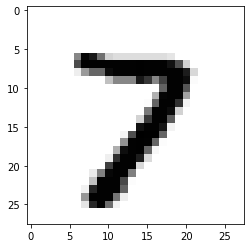

In [37]:
plt.imshow(rd_dgt_img, cmap = matplotlib.cm.binary , interpolation = 'nearest')
plt.show

In [38]:
y[4000]

'7'

In [40]:
# Spliting the Mnist Dataset for training and testing
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

In [41]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [42]:
y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)

In [43]:
y_train

array([4, 2, 0, ..., 8, 8, 7])

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
clf = LogisticRegression(tol = 0.1) # set tolerance to 0.1 that helps to max number of correct predictions 

In [46]:
# fit is used to adjustment the weights to predict the actual value in the prediction with better computation.
clf.fit(x_train,y_train) 

C:\Users\thond\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [49]:
# Classification model prediction
clf.predict([x[20]])

array([4])

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
# Measure accuracy score that performs on the future data
scores = cross_val_score(clf, x_train, y_train, cv = 3, scoring = 'accuracy') # cv is nothing but k(Division of the dataset)

C:\Users\thond\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\thond\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [52]:
scores

array([0.9176 , 0.91485, 0.9167 ])

In [53]:
# Calculate the mean of the accuracy 
scores.mean()

0.9163833333333334